In [1]:
import geopandas as gpd
from shapely import geometry
from geopandas.tools import sjoin

In [2]:
# polygon of all countries
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [3]:
# set a point
point = geometry.Point(6, 51)

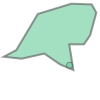

In [4]:
# goal to select NL as polygon where the point is within
nl = gdf[gdf.name=='Netherlands'].geometry.tolist()
nl.append(point)
geometry.GeometryCollection(nl)

In [5]:
# METHOD 1
tree = gdf.sindex

In [6]:
#%%timeit 1.81 ms ± 52.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
bbox_matches = list(tree.intersection(point.bounds))
gdf_matches = gdf.iloc[bbox_matches]
gdf_match = gdf_matches[gdf_matches.intersects(point)]
gdf_match

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
130,17084719,Europe,Netherlands,NLD,870800.0,"POLYGON ((6.905139601274129 53.48216217713065,..."


In [7]:
# METHOD 2

In [8]:
#%%timeit 25.8 ms ± 567 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
gdf_pt = gpd.GeoDataFrame(geometry=[point], crs={'init':'epsg:4326'})
gdf_match = sjoin(gdf_pt, gdf, how='left', op='within')
gdf_match

,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
0,POINT (6 51),130,17084719,Europe,Netherlands,NLD,870800.0


In [9]:
# METHOD 3

In [10]:
#%%timeit 24.6 ms ± 914 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
for ix, geom in gdf.iterrows():
    if point.within(geom.geometry):        
        s_match = gdf.iloc[ix]
gdf_match = s_match.to_frame().T
gdf_match

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
130,17084719,Europe,Netherlands,NLD,870800,"POLYGON ((6.905139601274129 53.48216217713065,..."


In [ ]:
# METHOD 1 is the fastest